*Contenuti*
===

- [Analisi della stagionalità](#Analisi-della-stagionalità)
    - [Resampling](#Resampling)
    - [Esercizio 1.4](#Esercizio-1.4)
- [Rolling windows](#Rolling-windows)
    - [Esercizio 2.1](#Esercizio-2.1)
- [Analisi dei trend di una serie temporale](#Analisi-dei-trend-di-una-serie-temporale)
    - [Esercizio 2.2](#Esercizio-2.2)
- [Decomposizione](#Decomposizione)

Resampling
---
Quando si campiona una serie temporale a una frequenza più bassa di quella originale stiamo facendo *downsampling*. Per questa operazione ci serve una funzione di aggregazione.

Viceversa, aumentare la frequenza di una serie temporale si chiama *upsampling*. Di che ingrediente abbiamo bisogno in questo caso?


Il downsampling è un altro strumento valido per analizzare la stagionalità di una serie temporale. La funzione *resample* di Pandas fa al caso nostro.

In [31]:
df['Consumption']['2013']

Date
2013-01-01     906.910
2013-01-02    1160.174
2013-01-03    1199.565
2013-01-04    1198.952
2013-01-05    1108.271
                ...   
2013-12-27    1166.552
2013-12-28    1089.790
2013-12-29    1031.149
2013-12-30    1149.097
2013-12-31    1068.429
Name: Consumption, Length: 365, dtype: float64

In [32]:
df['Consumption']['2013'].resample('W')

Pandas prevede diversi *alias* per alcune frequenze di ricampionamento. Qui l'elenco completo: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases.

Da sola, la funzione resample non basta. Come abbiamo accennato, ci serve una funzione di aggregazione.

In [33]:
df['Consumption']['2013'].resample('W').mean()

Date
2013-01-06    1101.531333
2013-01-13    1322.050286
2013-01-20    1388.535857
2013-01-27    1402.458000
2013-02-03    1319.079429
2013-02-10    1353.813857
2013-02-17    1367.142143
2013-02-24    1348.114857
2013-03-03    1333.157143
2013-03-10    1288.966000
2013-03-17    1330.768000
2013-03-24    1319.451143
2013-03-31    1225.623571
2013-04-07    1264.175571
2013-04-14    1278.603143
2013-04-21    1247.121286
2013-04-28    1246.434286
2013-05-05    1187.129714
2013-05-12    1181.149286
2013-05-19    1216.388857
2013-05-26    1179.325857
2013-06-02    1165.471429
2013-06-09    1190.125429
2013-06-16    1194.735857
2013-06-23    1220.914571
2013-06-30    1183.650857
2013-07-07    1204.902429
2013-07-14    1198.380429
2013-07-21    1203.554857
2013-07-28    1222.830143
2013-08-04    1215.101143
2013-08-11    1220.390714
2013-08-18    1193.074286
2013-08-25    1207.629714
2013-09-01    1219.791857
2013-09-08    1262.145571
2013-09-15    1263.348857
2013-09-22    1282.007857
2013-09

Tra gli argomenti della funzione resample, *label* permette di scegliere se assegnare al nuovo indice il valore dell'estremo sinistro o destro della finestra.

In [34]:
df['Consumption']['2013'].resample('W', label='left').mean()

Date
2012-12-30    1101.531333
2013-01-06    1322.050286
2013-01-13    1388.535857
2013-01-20    1402.458000
2013-01-27    1319.079429
2013-02-03    1353.813857
2013-02-10    1367.142143
2013-02-17    1348.114857
2013-02-24    1333.157143
2013-03-03    1288.966000
2013-03-10    1330.768000
2013-03-17    1319.451143
2013-03-24    1225.623571
2013-03-31    1264.175571
2013-04-07    1278.603143
2013-04-14    1247.121286
2013-04-21    1246.434286
2013-04-28    1187.129714
2013-05-05    1181.149286
2013-05-12    1216.388857
2013-05-19    1179.325857
2013-05-26    1165.471429
2013-06-02    1190.125429
2013-06-09    1194.735857
2013-06-16    1220.914571
2013-06-23    1183.650857
2013-06-30    1204.902429
2013-07-07    1198.380429
2013-07-14    1203.554857
2013-07-21    1222.830143
2013-07-28    1215.101143
2013-08-04    1220.390714
2013-08-11    1193.074286
2013-08-18    1207.629714
2013-08-25    1219.791857
2013-09-01    1262.145571
2013-09-08    1263.348857
2013-09-15    1282.007857
2013-09

Costruiamo un nuovo dataframe in modo da poterlo plottare comodamente insieme al precedente.

In [35]:
df_consumption_2013_weekly = df['Consumption']['2013'].resample('W').mean()

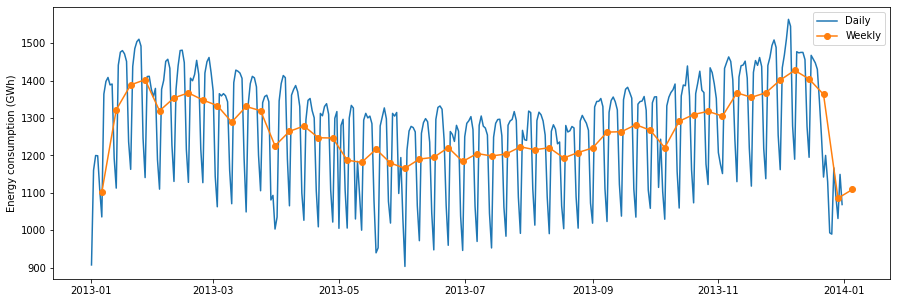

In [36]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df['Consumption']['2013'], label='Daily')
ax.plot(df_consumption_2013_weekly, marker='o', label='Weekly')
ax.set_ylabel('Energy consumption (GWh)')
ax.legend()

Che effetto abbiamo ottenuto ricampionando con una finestra temporale settimanale?

Esercizio 1.4
---
Confrontare in un unico plot l'andamento mensile di
- consumo totale di energia elettrica
- produzione di energia rinnovabile (solare, eolica e somma delle due).

Rappresentare l'andamento annuale del rapporto tra
- produzione totale di energia rinnovabile
- consumo di energia elettrica.

Rolling windows
===
strumento simile a resample; raggruppamento e funzione di aggregazione. Scorre, quindi i dati hanno la stessa granularità di quelli originali.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/OPSD_Germany_all.csv',
                 parse_dates=True,
                 index_col='Date')

df['Renewable'] = df['Solar'] + df['Wind']


df.head()

,Consumption,Wind,Solar,Renewable
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [3]:
pd.DataFrame.rolling?

In [4]:
df['Consumption']

Date
2006-01-01    1069.18400
2006-01-02    1380.52100
2006-01-03    1442.53300
2006-01-04    1457.21700
2006-01-05    1477.13100
                 ...    
2017-12-27    1263.94091
2017-12-28    1299.86398
2017-12-29    1295.08753
2017-12-30    1215.44897
2017-12-31    1107.11488
Name: Consumption, Length: 4383, dtype: float64

immaginiamo di sommare i valori all'interno di una finestra di 3 giorni.

In [5]:
df['Consumption'][:1]

Date
2006-01-01    1069.184
Name: Consumption, dtype: float64

In [6]:
df['Consumption'][:2].sum()

2449.705000000001

In [7]:
df['Consumption'][:3].sum()

3892.2380000000007

In [8]:
df['Consumption'][1:4].sum()

4280.271000000001

In [9]:
df['Consumption'][2:5].sum()

4376.881

In [10]:
df['Consumption'].rolling('3D').sum()

Date
2006-01-01    1069.18400
2006-01-02    2449.70500
2006-01-03    3892.23800
2006-01-04    4280.27100
2006-01-05    4376.88100
                 ...    
2017-12-27    3505.34112
2017-12-28    3693.92172
2017-12-29    3858.89242
2017-12-30    3810.40048
2017-12-31    3617.65138
Name: Consumption, Length: 4383, dtype: float64

In [11]:
df['Consumption'].rolling(3).sum()

Date
2006-01-01           NaN
2006-01-02           NaN
2006-01-03    3892.23800
2006-01-04    4280.27100
2006-01-05    4376.88100
                 ...    
2017-12-27    3505.34112
2017-12-28    3693.92172
2017-12-29    3858.89242
2017-12-30    3810.40048
2017-12-31    3617.65138
Name: Consumption, Length: 4383, dtype: float64

In [12]:
df['Consumption'].rolling(3, min_periods=1).sum()

Date
2006-01-01    1069.18400
2006-01-02    2449.70500
2006-01-03    3892.23800
2006-01-04    4280.27100
2006-01-05    4376.88100
                 ...    
2017-12-27    3505.34112
2017-12-28    3693.92172
2017-12-29    3858.89242
2017-12-30    3810.40048
2017-12-31    3617.65138
Name: Consumption, Length: 4383, dtype: float64

In [13]:
df['Consumption'].rolling(3, center=True).sum()

Date
2006-01-01           NaN
2006-01-02    3892.23800
2006-01-03    4280.27100
2006-01-04    4376.88100
2006-01-05    4337.77500
                 ...    
2017-12-27    3693.92172
2017-12-28    3858.89242
2017-12-29    3810.40048
2017-12-30    3617.65138
2017-12-31           NaN
Name: Consumption, Length: 4383, dtype: float64

In [14]:
df['Consumption'][:7].sum()

9530.300000000001

In [15]:
df['Consumption'].rolling(7, center=True).sum()

Date
2006-01-01           NaN
2006-01-02           NaN
2006-01-03           NaN
2006-01-04    9530.30000
2006-01-05    9669.10100
                 ...    
2017-12-27    8457.49890
2017-12-28    8422.85648
2017-12-29           NaN
2017-12-30           NaN
2017-12-31           NaN
Name: Consumption, Length: 4383, dtype: float64

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [17]:
plt.rcParams['figure.figsize'] = (15,3)

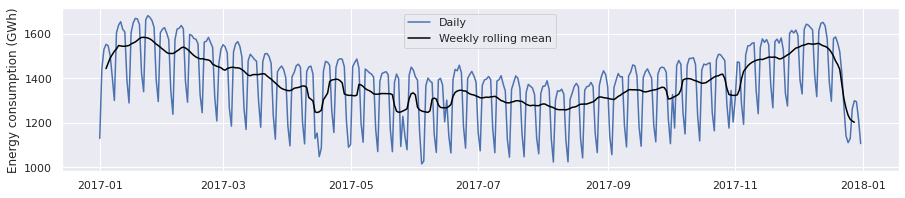

In [18]:
plt.plot(df['Consumption']['2017'],
        label='Daily',
       )

plt.plot(df['Consumption']['2017'].rolling(7, center=True).mean(),
        label='Weekly rolling mean',
        color='black')


plt.ylabel('Energy consumption (GWh)')
plt.legend()

Esercizio 2.1
---
: confrontare rolling window e resample settimanale (anche shape) su energia solare nel periodo 01-07 2017

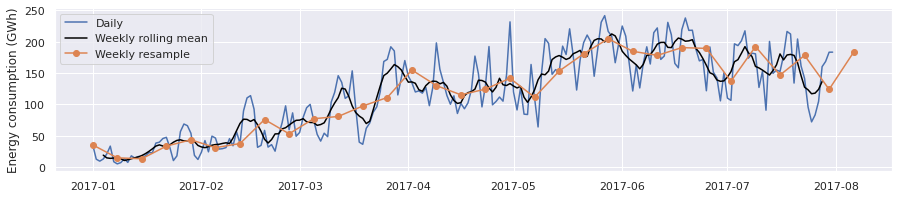

In [19]:
plt.plot(df['Solar']['2017-01':'2017-07'],
        label='Daily'
       )

plt.plot(df['Solar']['2017-01':'2017-07'].rolling(7, center=True).mean(),
        label='Weekly rolling mean',
        color='black')

plt.plot(df['Solar']['2017-01':'2017-07'].resample('W').mean(),
        marker='o',
        label='Weekly resample')

plt.ylabel('Energy consumption (GWh)')
plt.legend()

Analisi dei trend di una serie temporale
---

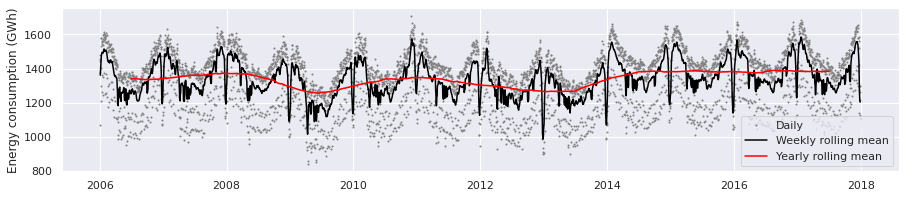

In [20]:
plt.plot(df['Consumption'],
        marker='.',
        markersize=2,
        linestyle='',
        label='Daily',
        color='gray')

plt.plot(df['Consumption'].rolling(7, center=True).mean(),
        label='Weekly rolling mean',
        color='black')

plt.plot(df['Consumption'].rolling(365, center=True).mean(),
        label='Yearly rolling mean',
        color='red')

plt.ylabel('Energy consumption (GWh)')
plt.legend()

Esercizio 2.2
---

trend: confronto trend rinnovabili e consumo

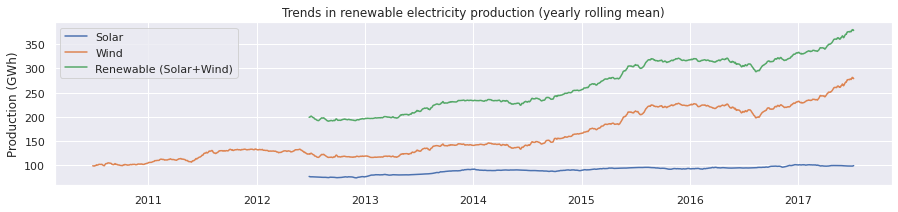

In [22]:
plt.plot(df['Solar'].rolling(365, center=True, min_periods=360).mean(),
        label='Solar')

plt.plot(df['Wind'].rolling(365, center=True, min_periods=360).mean(),
        label='Wind')

plt.plot(df['Renewable'].rolling(365, center=True, min_periods=360).mean(),
        label='Renewable (Solar+Wind)')

plt.title('Trends in renewable electricity production (yearly rolling mean)')
plt.ylabel('Production (GWh)')
plt.legend()

Decomposizione
===
decomposizione trend/stagionalità; metodi predittivi

---

<script>
  $(document).ready(function(){
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('div.prompt').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by OVHCloud.
</footer>